In [1]:
!pip install -q tf-nightly
import tensorflow as tf

     |████████████████████████████████| 517.7MB 26kB/s 
     |████████████████████████████████| 3.0MB 28.8MB/s 
     |████████████████████████████████| 460kB 45.1MB/s 


In [0]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
embedding_layer = layers.Embedding(1000, 5)

In [4]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[ 0.0224191 , -0.03918777, -0.02400732,  0.0159285 ,  0.03155488],
       [-0.00311109,  0.00752573,  0.01387708,  0.00305717,  0.02402939],
       [ 0.01681134, -0.03840054, -0.0027109 ,  0.00297029,  0.04349873]],
      dtype=float32)

In [5]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

In [6]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK0A0ZX/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK0A0ZX/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK0A0ZX/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [7]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [8]:
train_data

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [0]:
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = ([None], []))
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=([None], []))


In [0]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)


In [11]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[1284, 1125, 1982, ...,    0,    0,    0],
       [  12,  109, 7968, ...,    2, 6859, 7975],
       [ 298,  582,    1, ...,    0,    0,    0],
       ...,
       [ 909, 6639, 1098, ...,    0,    0,    0],
       [7573,   34,    9, ...,    0,    0,    0],
       [ 979, 3029,  125, ...,    0,    0,    0]])

In [12]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.5152 - accuracy: 0.6840 - val_loss: 0.2947 - val_accuracy: 0.8750
Epoch 2/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2850 - accuracy: 0.8836 - val_loss: 0.3087 - val_accuracy: 0.8650
Epoch 3/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.2325 - accuracy: 0.9088 - val_loss: 0.3258 - val_accuracy: 0.8600
Epoch 4/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.2027 - accuracy: 0.9240 - val_loss: 0.3954 - val_accuracy: 0.8650
Epoch 5/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.1780 - accuracy: 0.9349 - val_loss: 0.2596 - val_accuracy: 0.9000
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1600 - accuracy: 0.9408 - val_loss: 0.3752 - val_accuracy: 0.8750
Epoch 7/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1433 - accuracy: 0.9480 - val_loss: 0.4775 - val_ac

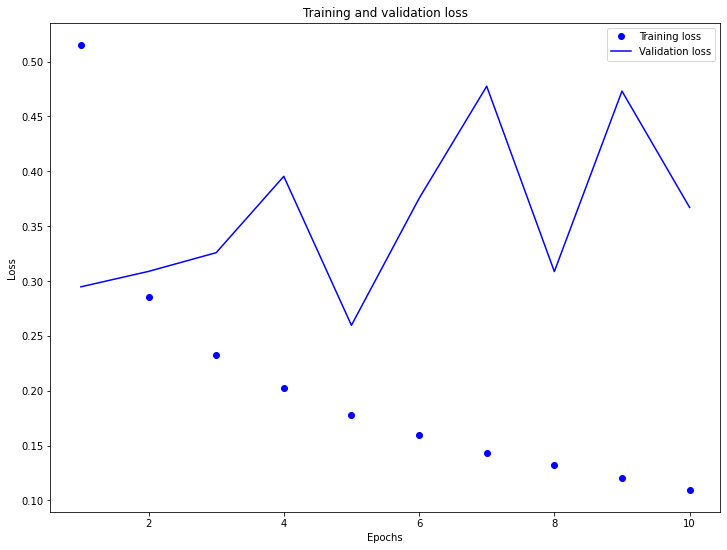

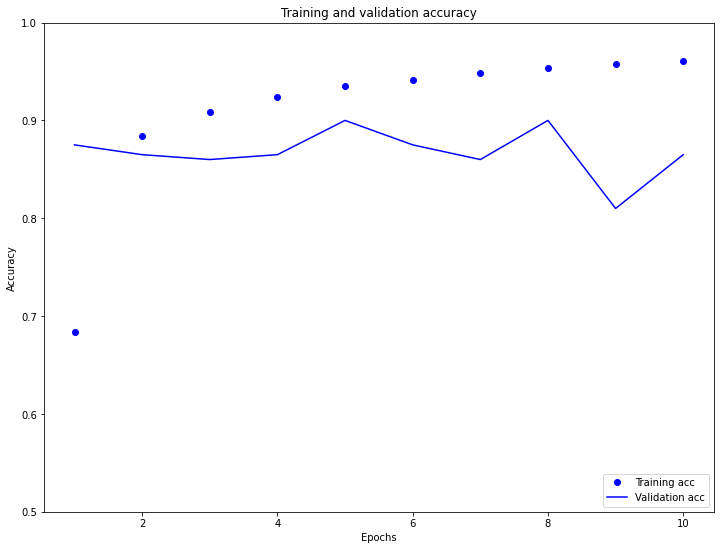

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(8185, 16)


In [0]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')